# Running Computational Alchemy for Catalysis: Transition State Barrier Height Predictions
This notebook outlines Python functions that use information from VASP calculations to predict descriptors for hypothetical catalyst.

In [1]:
import numpy as np
images = [str(int(n)) for n in np.linspace(0,9,10)]

from read_oszicar import grab_energy
image_energies = [grab_energy(oszicar='{0}/OSZICAR'.format(im)) for im in images]
print(image_energies)

[-116.85742, -116.84115, -116.79842, -116.69364, -116.43924, -115.95241, -116.47439, -116.55566, -116.66599, -116.66624]


In [2]:
from matplotlib import pyplot as plot
plot.plot(images,image_energies,'bo-')
plot.xlabel('NEB Image Number',weight='bold')
plot.ylabel('Energy (eV)',weight='bold')
plot.savefig('energy-profile.png',format='png',bbox_inches='tight',dpi=300)

In [3]:
from ase.io import read 
from ase.visualize import view
slab = read('slab/POSCAR',format='vasp')
slab_contcar = read('slab/CONTCAR',format='vasp')
ads = [read('{0}/POSCAR'.format(im),format='vasp') for im in images]
ads_contcar = [read('{0}/CONTCAR'.format(im),format='vasp') for im in images]

In [4]:
from ads_slab_pairs import pairs
p = [pairs(slab,slab) for a in ads]

In [5]:
from elec_stat_pot import (grab_esp,espdiff,remove_duplicate_espdiffs,heatmap)
slab_elec = grab_esp(poscar='slab/POSCAR',outcar='slab/OUTCAR')
ads_elec = [grab_esp(poscar='{0}/POSCAR'.format(im),
                     outcar='{0}/OUTCAR'.format(im)) for im in images]
diffs = [espdiff(elec1=slab_elec,elec2=ads_elec[im],pair=p[im]) for im in range(0,len(images))]

In [6]:
slab_vis = [heatmap(poscar='slab/POSCAR',dexlist=[dex[0] for dex in p[im]],espdiffs=diffs[im]) for im in range(0,len(images))]

In [7]:
from ase import Atom
from alloy_index import index_transmuted, transmuter, transmuted_directory_names
metal = Atom('Pt')
[transmute, counter] = index_transmuted(slab=slab,
                                        transmute_atom_sym=metal.symbol,
                                        counter_atom_sym=metal.symbol,
                                        transmute_num=8,
                                        counter_num=1,
                                        symmetric = False)

In [8]:
new_transmute = [transmute for im in range(0,len(images))]
new_counter = [counter for im in range(0,len(images))]

#new_transmute = [remove_duplicate_espdiffs(dexlist=transmute,
#                                          espdiffs=diffs[im]) for im in range(0,len(images))]
#new_counter = [remove_duplicate_espdiffs(dexlist=counter,
#                                          espdiffs=diffs[im]) for im in range(0,len(images))]

In [9]:
print(new_transmute)
print(new_counter)

[[12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11], [12, 13, 14, 15, 8, 9, 10, 11]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [16]:
#redefining transmute indexes because everything was done different when these codes were run in h2p
new_transmute = [[13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8]]
new_counter = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
print(new_transmute)
print(new_counter)

[[13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8], [13, 12, 15, 14, 11, 10, 9, 8]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [17]:
charge = 1
transmute_atom = Atom(metal.symbol)
transmute_atom.number += charge
counter_transmute_atom = Atom(metal.symbol)
counter_transmute_atom.number -= charge
all_transmute = [counter_transmute_atom,transmute_atom]

In [18]:
print('Transmuted Slab Labels')
transmuted_slabs = []
dir_slab = []
num = 0
for im in range(0,len(images)):
    print('Image: {0}'.format(im))
    transmuted_single_image = []
    dir_single_image = []
    for i,c in enumerate(new_counter[im]):
        for j,t in enumerate(new_transmute[im]):
            transmuted_single_image.append(transmuter(slab=slab_contcar,
                                                     atomdex=[c,t],
                                                     trans=all_transmute))
            dir_single_image.append(transmuted_directory_names(bdex=i,
                                                              tdex=j,
                                                              dexes=[c,t],
                                                              atoms_array=all_transmute))
    transmuted_slabs.append(transmuted_single_image)
    dir_slab.append(dir_single_image)
    print(dir_single_image)
    num += len(dir_single_image)
    print(num)

Transmuted Slab Labels
Image: 0
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
8
Image: 1
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
16
Image: 2
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
24
Image: 3
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
32
Image: 4
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
40
Image: 5
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
48
Image: 6
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
56
Image

In [19]:
print('Transmuted Ads Labels')
transmuted_ads = []
dir_ads = []
num = 0
for im in range(0,len(images)):
    print('Image: {0}'.format(im))
    transmuted_single_image = []
    dir_single_image = []
    for i,c in enumerate(new_counter[im]):
        for j,t in enumerate(new_transmute[im]):
            transmuted_single_image.append(transmuter(slab=ads_contcar[im],
                                                     atomdex=[c,t],
                                                     trans=all_transmute))
            dir_single_image.append(transmuted_directory_names(bdex=i,
                                                              tdex=j,
                                                              dexes=[c,t],
                                                              atoms_array=all_transmute))
    transmuted_ads.append(transmuted_single_image)
    dir_ads.append(dir_single_image)
    print(dir_single_image)
    num += len(dir_single_image)
    print(num)

Transmuted Ads Labels
Image: 0
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
8
Image: 1
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
16
Image: 2
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
24
Image: 3
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
32
Image: 4
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
40
Image: 5
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
48
Image: 6
['0.0.Ir1.Au13', '0.1.Ir1.Au12', '0.2.Ir1.Au15', '0.3.Ir1.Au14', '0.4.Ir1.Au11', '0.5.Ir1.Au10', '0.6.Ir1.Au9', '0.7.Ir1.Au8']
56
Image:

In [20]:
import os
from ase.io import write
from vasp_setup import make_potcar,make_kpoints,make_incar,make_job_script
os.mkdir('results')
os.chdir('results')
for im in range(0,len(images)):
    imdir = images[im]
    os.mkdir(imdir)
    os.chdir(imdir)
    os.mkdir('slab')
    os.chdir('slab')
    for i,s in enumerate(transmuted_slabs[im]):
        d = dir_slab[im][i]
        os.mkdir(d)
        os.chdir(d)
        home = os.getcwd()
        write('POSCAR',s,'vasp',sort=True)
        #make_potcar(home,'~/potcars/')
        make_kpoints(home,d,kspacing=[8,8,1])
        make_incar(home,d,encut=350,ismear=1,sigma=0.2,ibrion=-1,nsw=0)
        make_job_script(home,d,jobnum=i,nodes=1,cores=16,cluster='smp',partition='smp',hours=6)
        #os.system('sbatch job_sub.slurm')
        os.chdir('../')
    os.chdir('../')
    os.mkdir('ads')
    os.chdir('ads')
    for i,s in enumerate(transmuted_ads[im]):
        d = dir_ads[im][i]
        os.mkdir(d)
        os.chdir(d)
        home = os.getcwd()
        write('POSCAR',s,'vasp',sort=True)
        #make_potcar(home,'~/potcars/')
        make_kpoints(home,d,kspacing=[8,8,1])
        make_incar(home,d,encut=350,ismear=1,sigma=0.2,ibrion=-1,nsw=0)
        make_job_script(home,d,jobnum=i,nodes=1,cores=16,cluster='smp',partition='smp',hours=6)
        #os.system('sbatch job_sub.slurm')
        os.chdir('../')
        
    os.chdir('../../')
os.chdir('../')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'results'

In [21]:
adsorbate_energy = 0
slab_energy = grab_energy(oszicar='slab/OSZICAR')
ads_energy = image_energies
ref_be = [slab_energy + adsorbate_energy - ae for ae in ads_energy]

In [22]:
transmuted_slab_energy = [[grab_energy(oszicar=
                                       'results/{0}/slab/{1}/OSZICAR'.format(im,d)) for d in dir_slab[int(im)]] for im in images]
transmuted_ads_energy = [[grab_energy(oszicar=
                                       'results/{0}/ads/{1}/OSZICAR'.format(im,d)) for d in dir_ads[int(im)]] for im in images]

In [23]:
transmuted_be = [[transmuted_slab_energy[im][i] + adsorbate_energy - transmuted_ads_energy[im][i] for i in range(len(transmuted_slab_energy[im]))] for im in range(len(images))]
dft_del_be = [[round(transmuted_be[im][i] - ref_be[im],4) for i in range(len(transmuted_be[im]))] for im in range(len(images))]

In [24]:
from binding_energy import alc_be
dn = []
alc_del_be = []
for im in range(len(images)):
    dn_single_image = []
    alc_del_be_single_image = []
    for j in range(len(new_counter[im])):
        dn_single_image.append([alc_be(transmute=[new_transmute[im][i]],
             counter=[new_counter[im][j]],
             espdiffs=diffs[im],
             charge=charge)[0] for i in range(len(new_transmute[im]))])
        
        alc_del_be_single_image.append([alc_be(transmute=[new_transmute[im][i]],
                     counter=[new_counter[im][j]],
                     espdiffs=diffs[im],
                     charge=charge)[1] for i in range(len(new_transmute[im]))])
    
    dn_sum = []
    for dn_i in dn_single_image:
        dn_sum += dn_i
    alc_sum = []
    for alc_i in alc_del_be_single_image:
        alc_sum += alc_i
        
    dn.append(dn_sum)
    alc_del_be.append(alc_sum)

In [25]:
new_transmute_espdiffs = [[diffs[im][i] for i in new_transmute[im]] for im in range(len(images))]
new_counter_espdiffs = [[diffs[im][i] for i in new_counter[im]] for im in range(len(images))]

Text(0.5, 1.0, 'Image 0')

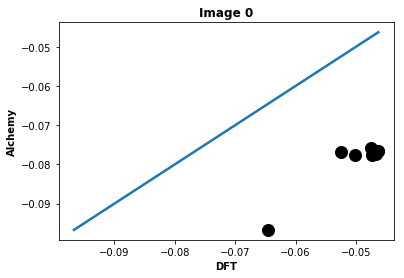

In [26]:
i = 0
plot.plot([min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          [min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          linewidth=2.5)
plot.plot(dft_del_be[i],alc_del_be[i],'ko',markersize=12)
plot.xlabel('DFT',weight='bold')
plot.ylabel('Alchemy',weight='bold')
plot.title('Image {0}'.format(i),weight='bold')

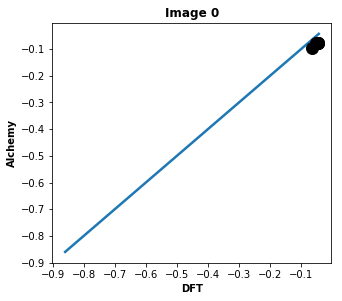

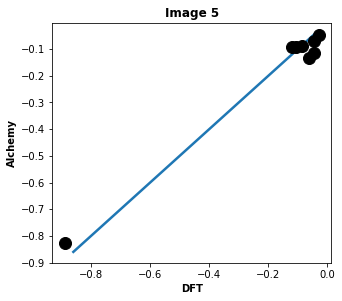

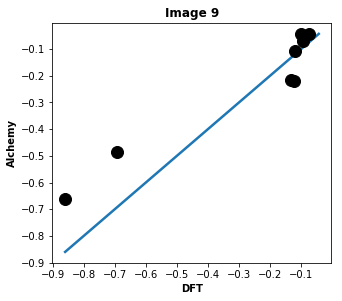

In [27]:
i = 9
fig = plot.figure(figsize=(5,15))
ax = fig.add_subplot(3,1,1)
ax.plot([min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          [min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          linewidth=2.5)
ax.plot(dft_del_be[0],alc_del_be[0],'ko',markersize=12)
ax.set_xlabel('DFT',weight='bold')
ax.set_ylabel('Alchemy',weight='bold')
ax.set_title('Image {0}'.format(0),weight='bold')
plot.savefig('neb0.svg',format='svg',bbox_inches='tight',dpi=300)

fig = plot.figure(figsize=(5,15))
ax = fig.add_subplot(3,1,2)
ax.plot([min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          [min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          linewidth=2.5)
ax.plot(dft_del_be[5],alc_del_be[5],'ko',markersize=12)
ax.set_xlabel('DFT',weight='bold')
ax.set_ylabel('Alchemy',weight='bold')
ax.set_title('Image {0}'.format(5),weight='bold')
plot.savefig('neb5.svg',format='svg',bbox_inches='tight',dpi=300)

fig = plot.figure(figsize=(5,15))
ax = fig.add_subplot(3,1,2)
ax.plot([min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          [min(dft_del_be[i]+alc_del_be[i]),max(dft_del_be[i]+alc_del_be[i])],
          linewidth=2.5)
ax.plot(dft_del_be[i],alc_del_be[i],'ko',markersize=12)
ax.set_xlabel('DFT',weight='bold')
ax.set_ylabel('Alchemy',weight='bold')
ax.set_title('Image {0}'.format(i),weight='bold')
plot.savefig('neb9.svg',format='svg',bbox_inches='tight',dpi=300)

In [31]:
from numpy import average
ae = [[round(abs(alc_del_be[im][i] - dft_del_be[im][i]),3) for i in range(len(alc_del_be[im]))] for im in range(len(images))]
mae = [round(average(ae[im]),3) for im in range(len(images))]

In [32]:
j = 9
print(len(dft_del_be[j]))
print(len(alc_del_be[j]))
print(len(ae[j]))
print(mae)

8
8
8
[0.029, 0.03, 0.028, 0.029, 0.028, 0.036, 0.069, 0.082, 0.09, 0.09]


In [30]:
print(max(ae[9]))

0.208


In [81]:
view(slab_vis)

In [77]:
view(ads_contcar[9])

In [74]:
view(ads[0])

In [85]:
for i in range(len(images)):
    print(min(diffs[i]))

-0.5762999999999892
-0.5482999999999976
-0.5144999999999982
-0.47860000000000014
-0.45649999999999125
-0.7295999999999907
-0.8067999999999955
-0.7941999999999894
-0.823299999999989
-0.8212999999999937


In [80]:
print(diffs[5])

[0.09350000000000591, 0.09850000000000136, 0.11240000000000805, 0.15500000000000114, 0.034099999999995134, 0.09049999999999159, 0.046700000000001296, 0.1910000000000025, 0.05289999999999395, 0.028399999999990655, 0.007799999999988927, 0.010199999999997544, -0.7295999999999907, -0.03519999999998902, 0.005400000000008731, -0.017599999999987403]
